In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Current_Pro_meta.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)
roles = list(df['Roles'])
rolelist = [i.split(',') for i in roles]
for n, i in enumerate(rolelist):
    rolelist[n]= [q.strip(' ') for q in i]
df['Roles'] = rolelist
df.sort_values('Win Rate', ascending = False).head()

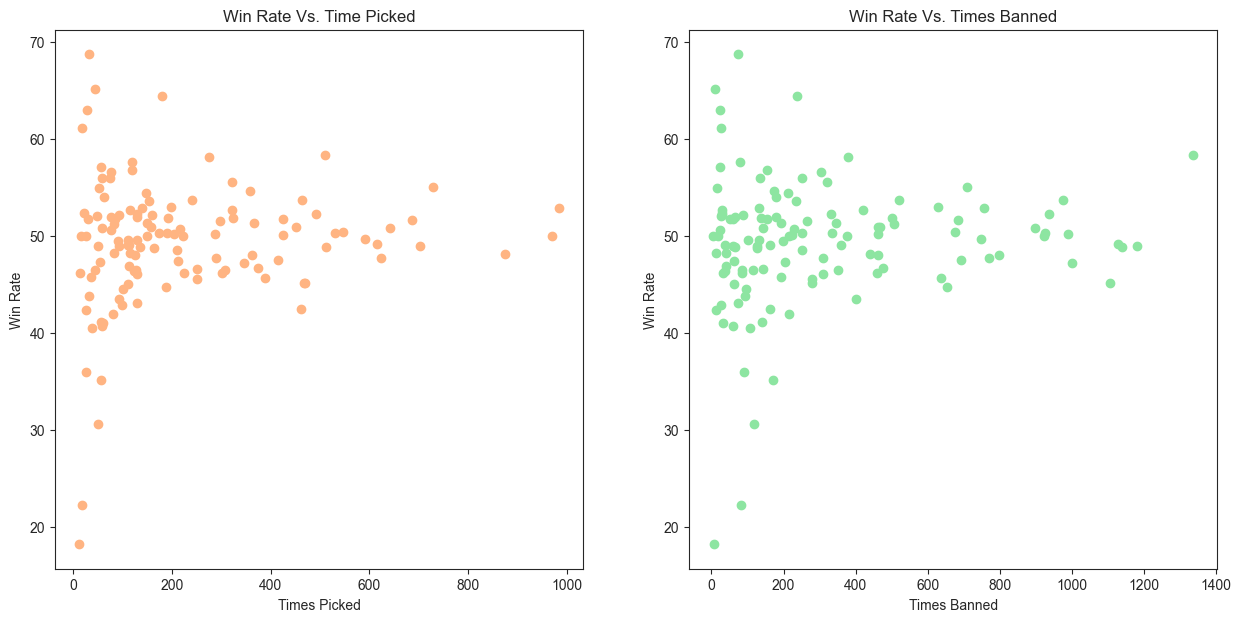

In [39]:
sns.set_style('ticks')
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].scatter(data = df, x = 'Times Picked',  y = 'Win Rate', color = colors[1])
ax[0].set_xlabel('Times Picked')
ax[0].set_ylabel('Win Rate')
ax[0].set_title('Win Rate Vs. Time Picked')

ax[1].scatter(data = df, x = 'Times Banned',  y = 'Win Rate', color = colors[2])
ax[1].set_xlabel('Times Banned')
ax[1].set_ylabel('Win Rate')
ax[1].set_title('Win Rate Vs. Times Banned')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


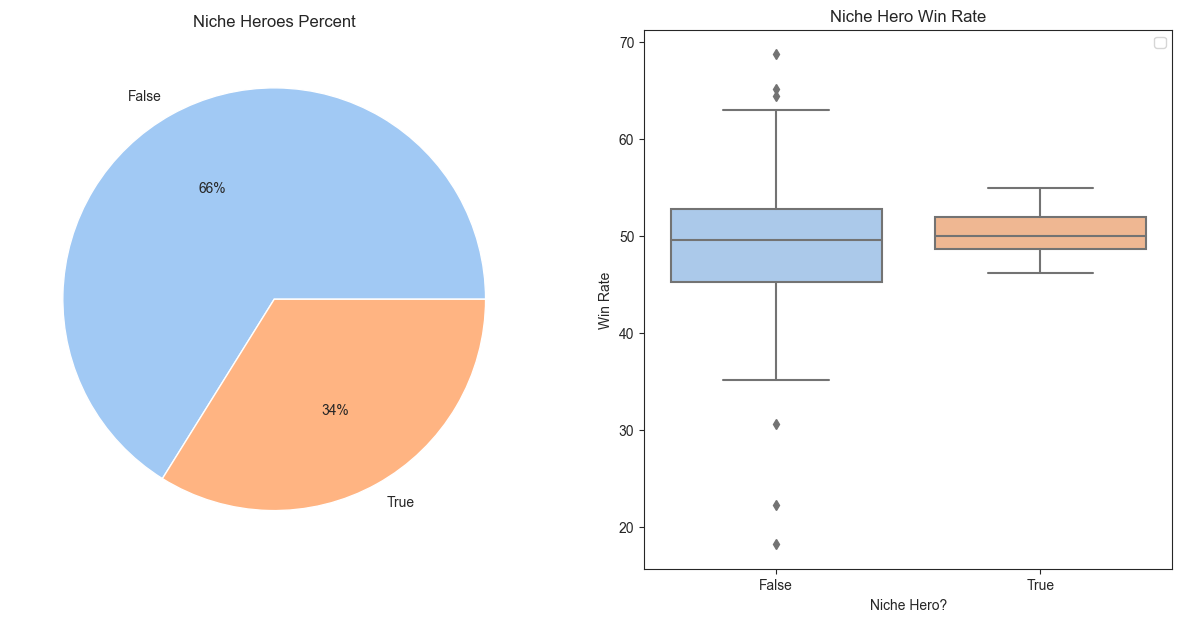

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].pie(x = df['Niche Hero?'].value_counts(), 
          labels = df['Niche Hero?'].value_counts().index,
          colors = colors,
          autopct='%.0f%%')
ax[0].set_title('Niche Heroes Percent')
sns.boxplot(data = df, x = 'Niche Hero?', y = 'Win Rate', palette = colors)
ax[1].set_title('Niche Hero Win Rate')
plt.legend()
plt.show()

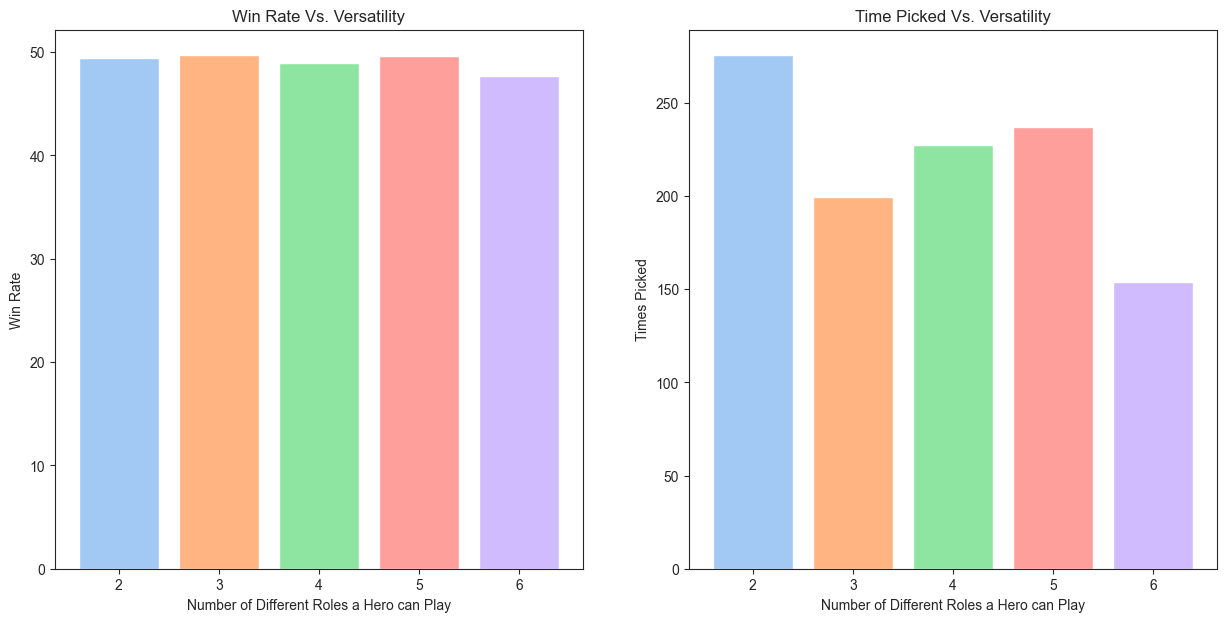

In [40]:
from collections import defaultdict

df['Versatility'] = [len(i) for i in list(df['Roles'])]
bar_df = df[['Win Rate', 'Versatility', 'Times Picked']].groupby('Versatility').mean()

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].bar(x = bar_df.index, height = bar_df['Win Rate'], color = colors)
ax[0].set_xlabel('Number of Different Roles a Hero can Play')
ax[0].set_ylabel('Win Rate')
ax[0].set_title('Win Rate Vs. Versatility')

ax[1].bar(x = bar_df.index, height = bar_df['Times Picked'], color = colors)
ax[1].set_xlabel('Number of Different Roles a Hero can Play')
ax[1].set_ylabel('Times Picked')
ax[1].set_title('Time Picked Vs. Versatility')
plt.show()

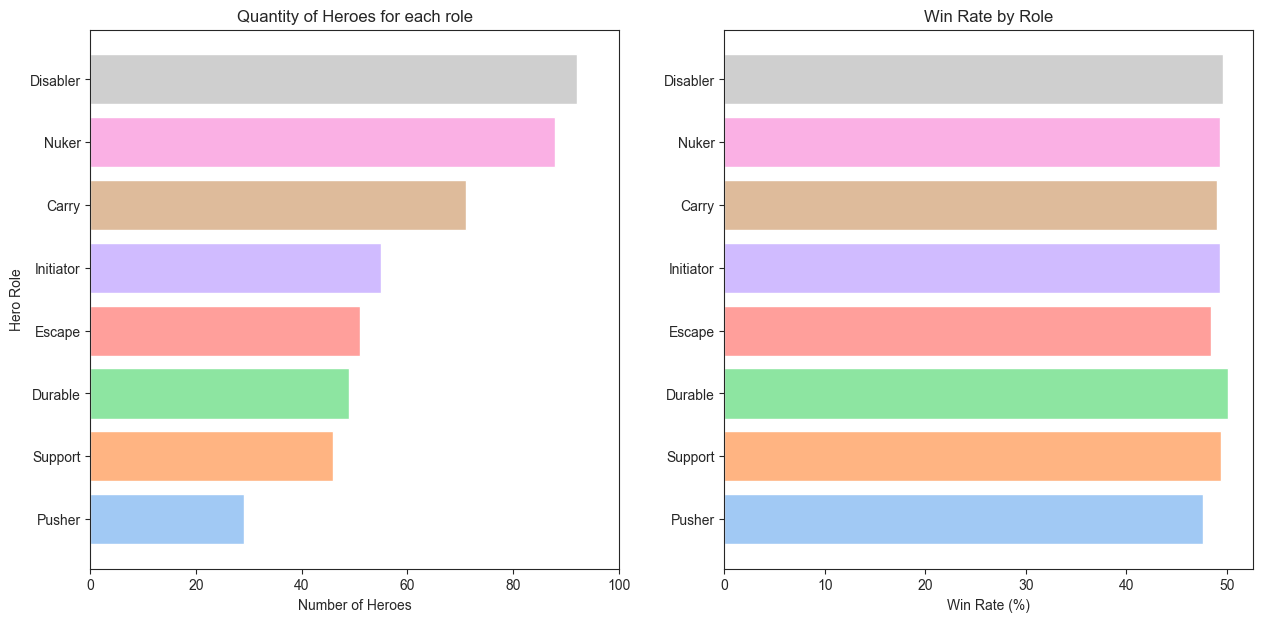

In [41]:
roles = list(df['Roles'])
roleNums = defaultdict(int)
for i in roles:
    for role in i:
        roleNums[role] += 1
roleNums = dict(sorted(roleNums.items(), key=lambda item: item[1]))
keys = []
items = []
winrate = []
niche = []
picks = []
for key, item in roleNums.items():
    keys.append(key)
    items.append(item) 
    filt = []
    for i in range(df.shape[0]):
        filt.append(key in df['Roles'].iloc[i])
    winrate.append(df[filt]['Win Rate'].mean())
    niche.append(df[filt]['Niche Hero?'].sum())
    picks.append(df[filt]['Times Picked'].mean())
    df[key] = filt
    
niche = [(niche[i]/items[i])*100 for i in range(len(niche))]
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].barh(keys, items, color = colors)
ax[0].set_ylabel('Hero Role')
ax[0].set_xlabel('Number of Heroes')
ax[0].set_xlim(0, 100)
ax[0].set_title('Quantity of Heroes for each role')
ax[1].barh(keys, winrate, color = colors)
ax[1].set_xlabel('Win Rate (%)')
ax[1].set_title('Win Rate by Role')
plt.show()

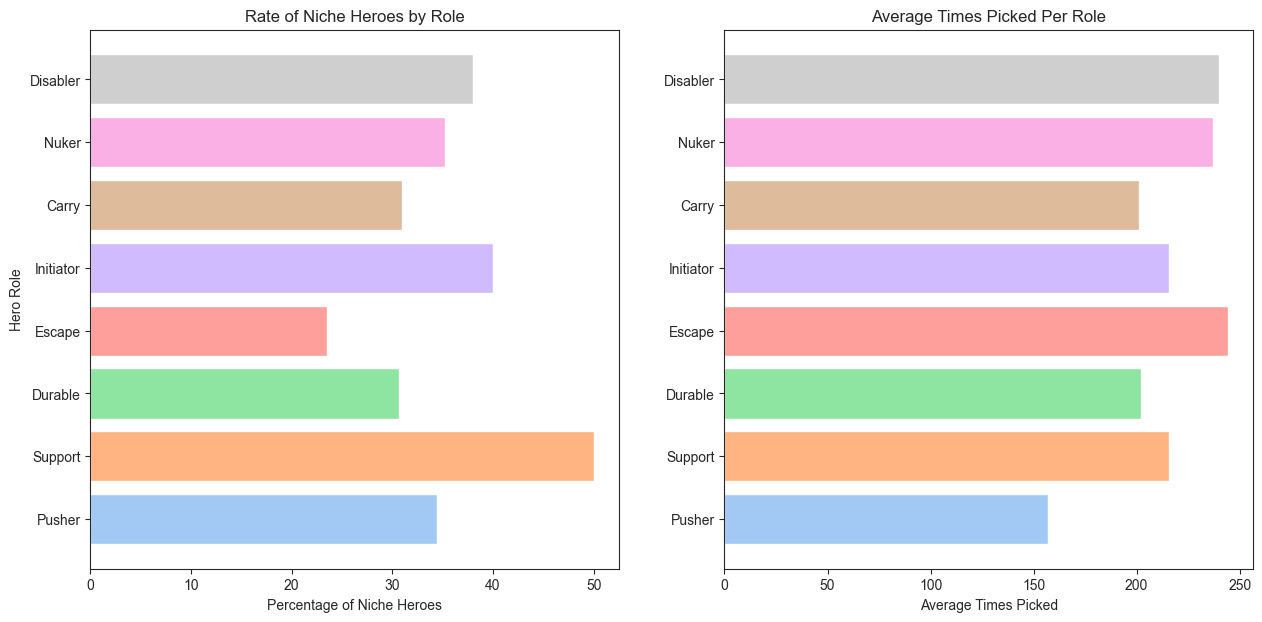

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].barh(keys, niche, color = colors)
ax[0].set_ylabel('Hero Role')
ax[0].set_xlabel('Percentage of Niche Heroes')
ax[0].set_title('Rate of Niche Heroes by Role')

ax[1].barh(keys, picks, color = colors)
ax[1].set_title('Average Times Picked Per Role')
ax[1].set_xlabel('Average Times Picked')
plt.show()

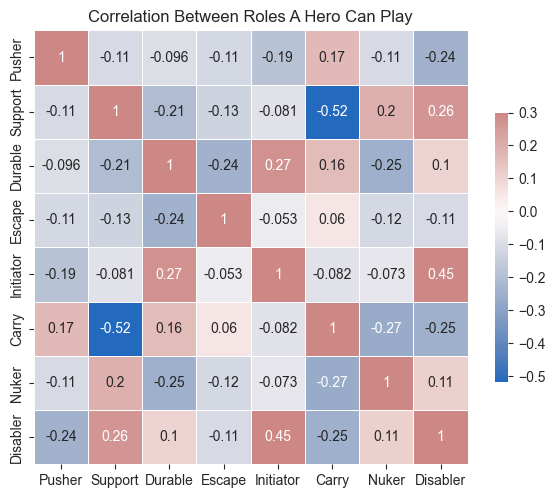

In [43]:
fig, ax = plt.subplots(figsize = (7,7))
corr = df[keys].corr()
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Between Roles A Hero Can Play')
plt.show()

In [47]:
df.dtypes

Name                  object
Primary Attribute     object
Attack Type           object
Attack Range           int64
Roles                 object
Total Pro wins         int64
Times Picked           int64
Times Banned           int64
Win Rate             float64
Niche Hero?             bool
Versatility            int64
Pusher                  bool
Support                 bool
Durable                 bool
Escape                  bool
Initiator               bool
Carry                   bool
Nuker                   bool
Disabler                bool
dtype: object

In [44]:
df.head()

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?,Versatility,Pusher,Support,Durable,Escape,Initiator,Carry,Nuker,Disabler
0,Abaddon,all,Melee,150,"[Support, Carry, Durable]",82,153,234,53.59,False,3,False,True,True,False,False,True,False,False
1,Alchemist,str,Melee,150,"[Carry, Support, Durable, Disabler, Initiator,...",48,92,88,52.17,True,6,False,True,True,False,True,True,True,True
2,Ancient Apparition,int,Ranged,675,"[Support, Disabler, Nuker]",30,59,143,50.85,False,3,False,True,False,False,False,False,True,True
3,Anti-Mage,agi,Melee,150,"[Carry, Escape, Nuker]",84,188,653,44.68,False,3,False,False,False,True,False,True,True,False
4,Arc Warden,agi,Ranged,625,"[Carry, Escape, Nuker]",14,32,92,43.75,False,3,False,False,False,True,False,True,True,False


In [53]:
# Hitung korelasi antara atribut dengan label 'Win Rate'
correlation = df[[ 'Win Rate','Attack Range', 'Total Pro wins', 'Times Picked', 'Times Banned', 'Versatility']].corr()

# Tampilkan korelas
print(correlation['Win Rate'])

Win Rate          1.000000
Attack Range      0.095409
Total Pro wins    0.163560
Times Picked      0.114173
Times Banned      0.099841
Versatility      -0.034045
Name: Win Rate, dtype: float64


In [51]:
# Hitung korelasi antara atribut dengan label 'Win Rate'
correlation = df[['Win Rate','Pusher', 'Support', 'Durable', 'Escape', 'Initiator', 'Carry', 'Nuker', 'Disabler','Niche Hero?']].corr()

# Tampilkan korelasi
print(correlation['Win Rate'])

Win Rate       1.000000
Pusher        -0.136043
Support        0.015439
Durable        0.100156
Escape        -0.102536
Initiator      0.003424
Carry         -0.046287
Nuker         -0.000070
Disabler       0.083458
Niche Hero?    0.085861
Name: Win Rate, dtype: float64


In [54]:
from sklearn.model_selection import train_test_split

X = df[['Times Picked']]
y = df['Win Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=123)

rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=123)

In [56]:
from sklearn.metrics import mean_absolute_error

# Predict train data
y_pred_train = rf_model.predict(X_train)

# Evaluasi model train data
mae_train = mean_absolute_error(y_train, y_pred_train)
print("MAE Train:", mae_train)

# Predict
y_pred_test = rf_model.predict(X_test)

# Evaluasi model test data
mae_test = mean_absolute_error(y_test, y_pred_test)
print("MAE Test:", mae_test)

MAE Train: 2.6008993566618575
MAE Test: 5.532057933333345


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


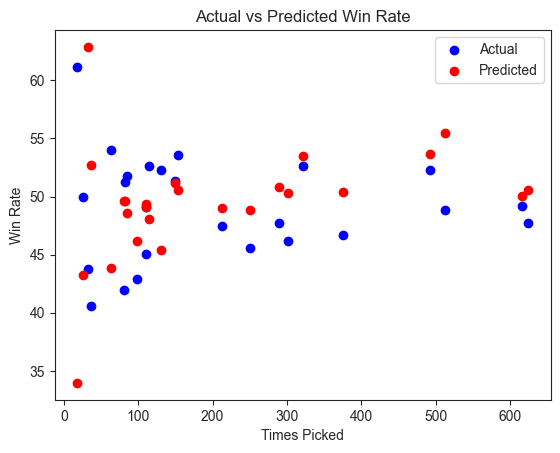

In [58]:
import matplotlib.pyplot as plt

# Visualisasi 
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.scatter(X_test, y_pred_test, color='r', label='Predicted')
plt.xlabel('Times Picked')
plt.ylabel('Win Rate')
plt.title('Actual vs Predicted Win Rate')
plt.legend()
plt.show()


In [59]:
from sklearn.model_selection import cross_val_score

# Cross validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores = -cv_scores
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


CV Scores: [6.12503096 3.54598599 6.33066913 5.8605472  5.20546321]
Mean CV Score: 5.413539299999997


## TIMES BANNED

In [61]:
from sklearn.model_selection import train_test_split

# Langkah 1: Split input-output
X = df[['Times Banned']]
y = df['Win Rate']

# Langkah 2: Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Langkah 3: Membangun model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=123)

# Langkah 4: Melatih model dengan data latih
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=123)

In [63]:
from sklearn.metrics import mean_absolute_error

# Langkah 5: Melakukan prediksi pada data latih
y_pred_train = rf_model.predict(X_train)

# Langkah 6: Evaluasi model menggunakan Mean Absolute Error (MAE) pada data latih
mae_train = mean_absolute_error(y_train, y_pred_train)
print("MAE Train:", mae_train)

# Langkah 7: Melakukan prediksi pada data uji
y_pred_test = rf_model.predict(X_test)

# Langkah 8: Evaluasi model menggunakan Mean Absolute Error (MAE) pada data uji
mae_test = mean_absolute_error(y_test, y_pred_test)
print("MAE Test:", mae_test)

MAE Train: 2.215095221260222
MAE Test: 4.444195609523811


In [64]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit GridSearchCV untuk mencari kombinasi parameter terbaik
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


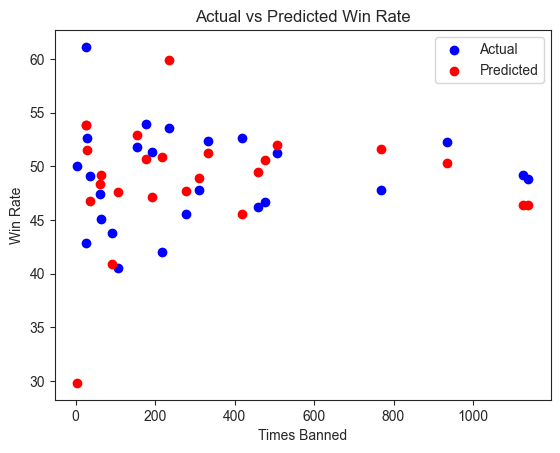

In [65]:
import matplotlib.pyplot as plt

# Visualisasi 
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.scatter(X_test, y_pred_test, color='r', label='Predicted')
plt.xlabel('Times Banned')
plt.ylabel('Win Rate')
plt.title('Actual vs Predicted Win Rate')
plt.legend()
plt.show()


In [66]:
from sklearn.model_selection import cross_val_score

# Cross validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores = -cv_scores
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


CV Scores: [6.74141462 3.22097884 5.25610724 4.486662   6.5944859 ]
Mean CV Score: 5.25992972214286
